In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    number3: int
    number4: int
    operation2: str
    finalNumber: int
    finalNumber2: int

In [23]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state
    
def subtractor(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state
    
def subtractor2(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node(state: AgentState)->AgentState:
    """This node will select the next node of the graph"""
    
    if state['operation'] == "+":
        return "addition_operation" 
    
    elif state['operation'] == "-":
        return "subtraction_operation" 
    
def decide_next_node_2(state: AgentState)->AgentState:
    """This node will select the next node of the graph"""
    
    if state['operation2'] == "+":
        return "addition_operation2" 
    
    elif state['operation2'] == "-":
        return "subtraction_operation2" 

In [24]:
graph = StateGraph(AgentState)

graph.add_node("adder",adder)
graph.add_node("subtractor",subtractor)
graph.add_node("adder2",adder2)
graph.add_node("subtractor2",subtractor2)
graph.add_node("router", lambda state:state) 
graph.add_node("router2", lambda state:state)
graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "adder",
        "subtraction_operation": "subtractor"
    }
)

graph.add_edge("adder", "router2")
graph.add_edge("subtractor", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node_2,
    {
        "addition_operation2": "adder2",
        "subtraction_operation2": "subtractor2"
    }
)

graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)

app = graph.compile()

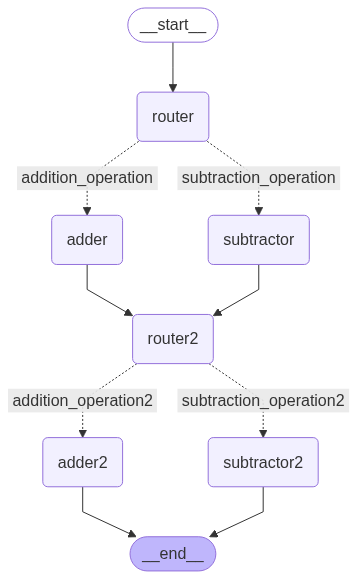

In [25]:
app

In [26]:
initial_state = AgentState(number1=10, operation="-", number2=5, number3=7, number4=2, operation2="+")
app.invoke(initial_state)

{'number1': 10,
 'operation': '-',
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation2': '+',
 'finalNumber': 5,
 'finalNumber2': 9}